In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

import os, sys
sys.path.append(os.path.abspath('../src'))
from pipeline import SCETPipeline

In [2]:
scet = SCETPipeline()

No sentence-transformers model found with name allenai/specter2_base. Creating a new one with mean pooling.


In [13]:
def plot_clusters(clusters, out_path: str = None):
    counts = clusters.groupby(['year', 'cluster_label']).size().unstack(fill_value=0)
    fig, ax = plt.subplots(figsize=(10, 6))
    counts.plot(kind='bar', stacked=True, ax=ax, width=0.9)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Papers")
    ax.legend(title="Concepts")
    plt.tight_layout()
    # save to path if given
    if out_path:
        out_dir = "../doc/report/images"
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/{out_path}")
    plt.show()

## Transformer

In [14]:
transformer = scet.process('Transformer', alpha=0.75)
transformer.concept_clusters.cluster_label.unique()

array(['transform, methods, techniques, technique, electric',
       'transform, transformers, ##er, models, architecture',
       'theory, paper, experiment, papers, math'], dtype=object)

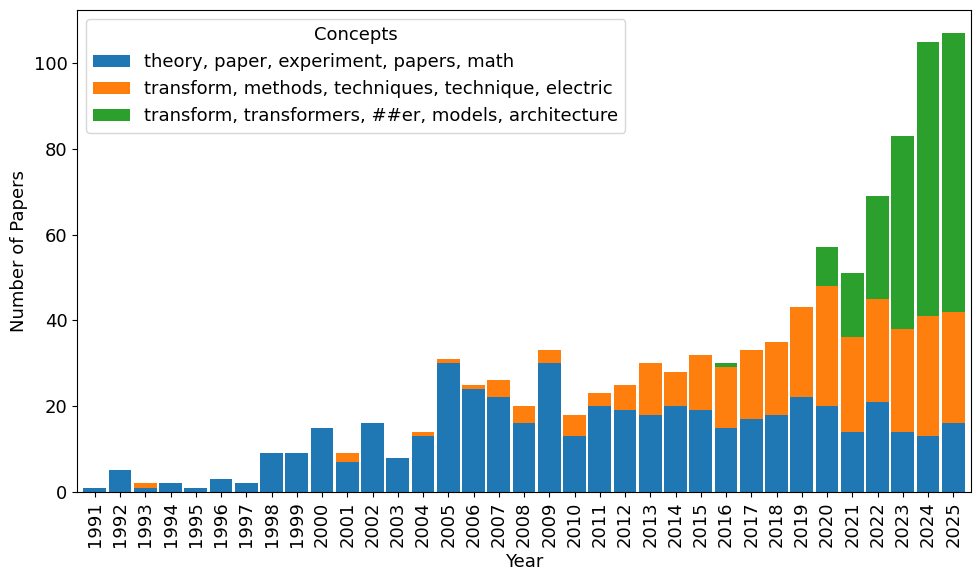

In [15]:
plot_clusters(transformer.concept_clusters, out_path="case_transformer.png")

## Entropy

In [16]:
entropy = scet.process('entropy')
entropy.concept_clusters.cluster_label.unique()

array(['entropy, ss, theory, random, quantum',
       'entropy, ss, shannon, information, theory'], dtype=object)

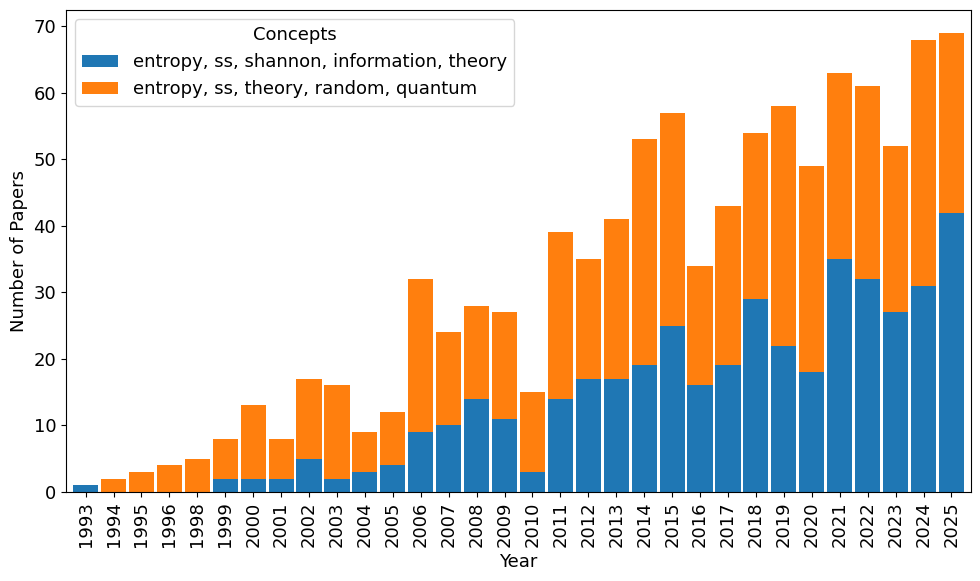

In [17]:
plot_clusters(entropy.concept_clusters, out_path="case_entropy.png")

## Token

In [18]:
token = scet.process('token')
token.concept_clusters.cluster_label.unique()

array(['token, models, ll, model, languages',
       'token, crypt, ##chai, ether, block'], dtype=object)

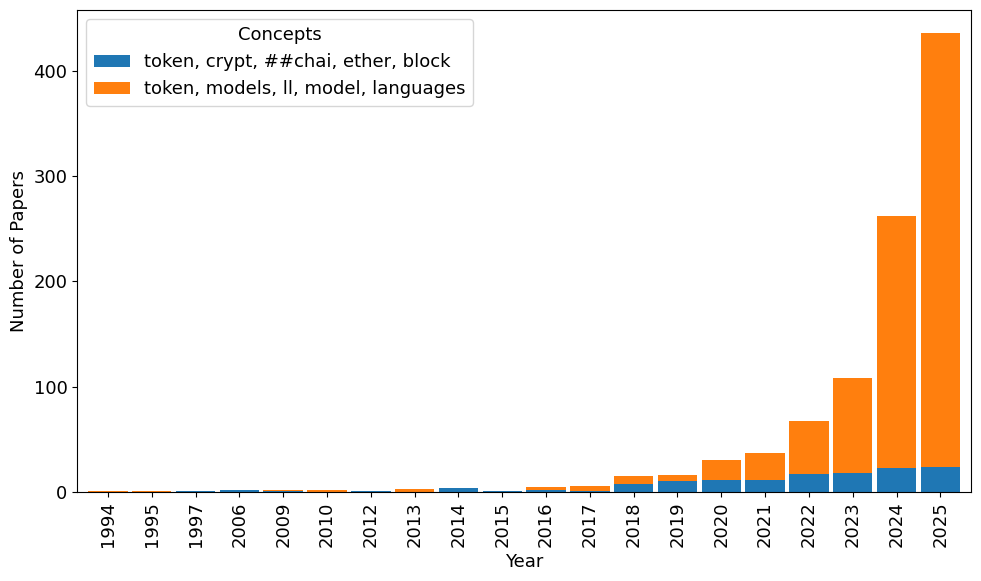

In [19]:
plot_clusters(token.concept_clusters, out_path="case_token.png")